The goal of this practical session is to introduce Python and Scikit-Learn, a library for running different machine learning models and use them for solving AI/data science problems.

## Linear regression and k-NN: doing it ourselves

We are going to write a first program to compute the coefficients of a regression line and a second program to compute the k-nearest neighbours (k-NN) of a given point.

### Linear regression

We'll start with a simple data set:

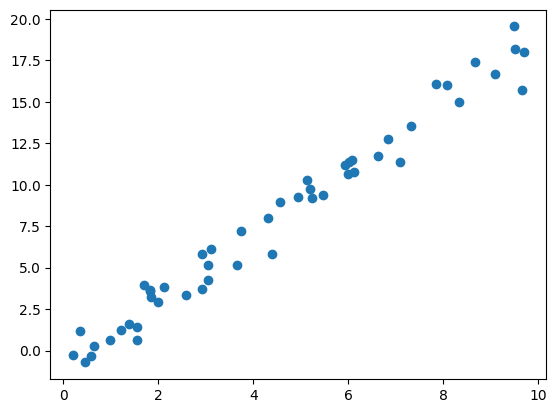

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

$\rightarrow$ Print the values of x and y. What's the type of x and y? What's their relation? What's the level of noise in this relation?

In [2]:
print("Données x:",x)
print("Données y:",y)

Données x: [3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]
Données y: [ 7.22926896 18.18565441 13.52423055 10.67206599  0.64185082  1.4000462
 -0.29896653 17.38064514 11.36591852 11.3984114  -0.26422614 18.01311476
 14.97193082  3.8584585   3.66749887  3.59937032  4.24562734  9.18591626
  7.9701638   5.80012793 10.75788366  1.60421824  3.736558    5.13103024
  8.93392551 16.05975926  2.92146552 10.28822167 11.2099274  -0.7161115
 11.51229264  3.94851904  0.26520582 19.5423544  15.69289

$\hookrightarrow$ $x$ et $y$ sont des vecteurs de réels de dimension 50 (tableau de 50 valeurs). La relation qui les unit est linéaire ($y = 2x -1$) plus un bruit aléatoire gaussien (distribué selon une loi normale de moyenne $0$ et de variance $1$). 

   
We now want to find the relation between x and y solely from the observed points. We can postulate different possible relations (models): linear, polynomial of degree 2, spline, ... and learn the parameters of the models from the data. We'll start here with the most simple model, the linear one, which assumes that the relation takes the form:

\begin{equation*}
 y = ax + b,
\end{equation*}

where $a$ and $b$ are real numbers, respectively called the slope and the intercept (or bias). Learning the model thus amounts to learn the values of $a$ and $b$ from the observed data (we will denote by $\hat{a}$ and $\hat{b}$ the values of $a$ and $b$ learned from the observed data).

We nevertheless need to guide the learning by stating some properties on the desired line. In linear regression, the property we require is that the line learned should be as close as possible to the obersved data. By "as close as", we mean that the sum of squared residuals should be as small as possible (this method is sometimes referred to as OLS for Ordinary Least Square). The residual is defined as the error in approximating y by a linear relation. If we have observed $n$ points (x<sub>i</sub>,y<sub>i</sub>)<sub>$1 \le i \le n$</sub>, the sum of residuals amounts to:

\begin{equation*}
 \sum_{i=1}^{n}(y_i - a x_i - b)^2.
\end{equation*}

The above optimization problem leads to the following solution (we'll see that later in the course) where $\bar{x}$ and $\bar{y}$ denote the means of x and y:

\begin{align}
 \hat{a} = & \frac{\sum_{i=1}^{n}(x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}, \\
 \hat{b} = & \bar{y} - \hat{a} \bar{x}.
\end{align}

$\rightarrow$ Write a program that computes the coefficients of the line (slope and intercept) and draw the line together with the orginal data points.

$\hookrightarrow$ See below.

$\rightarrow$ How to use the above results to predict the y value of new points for which we only know x?

$\hookrightarrow$ We just predict the new value of a new point $x$ by applying the formula: 

\begin{equation*}
 y = \hat{a}x + \hat{b}.
\end{equation*}


Slope:  1.9776566003853098 , Intercept:  -0.9033107255311075 , Residuals:  41.15355718743439


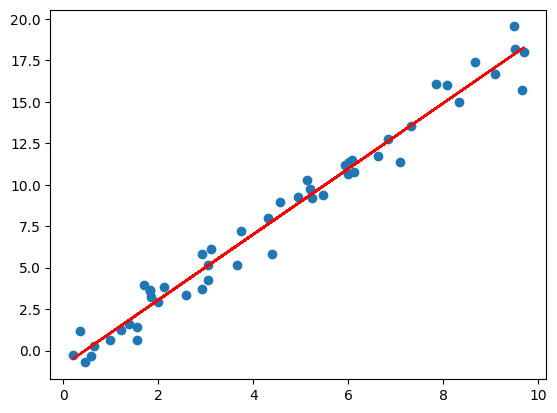

In [2]:
# Compute means
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)

# Compute slope and intercept
num = 0
denum = 0
for i in range(len(x)):
    num += ((x[i]-x_mean)*(y[i]-y_mean))
for i in range(len(x)):
    denum += ((x[i]-x_mean)**2)
slope = num/denum
intercept = y_mean - slope*x_mean

# Compute residuals
resid = 0
for i in range(len(x)):
    resid += ((y[i] - slope*x[i] - intercept)**2)

# Print results
print("Slope: ",slope,", Intercept: ",intercept,", Residuals: ",resid)
plt.plot(x,slope*x+intercept,'r')
plt.scatter(x, y)
plt.show()

### k-Nearest Neighbours (k-NN) on Iris dataset

We are now going to implement a code that can predict a class label of a new example given known class labels of several examples. The examples with the known labels constitute the <span style="color:green">training set</span>.

To do so we are going to consider the Iris dataset, which consists of 4-dimensional examples (the dimensions correspond to sepal length, sepal width, petal length and petal width) associated with a class label from three possible iris species. 

For each new example with unknown class label, the $k$-NN algorithm consists in retrieving the $k$ nearest neighbours in the training set (using in our case their 4-dimensional representation) and in assigning to the new example the majority class in the set of $k$ nearest neigbours.

$\rightarrow$ You are asked to write a code that can take that can predict the class label of examples which are not part of the training set (this set of examples will be referred to as the <span style="color:green">test set</span> in the remainder). The value of $k$ should be an argument of your program, which you can play with. You'll use the standard Eucliden distance to measure the distance between point and select the $k$ closest ones.

$\hookrightarrow$ See below.

The Iris dataset can be loaded and split in train/test parts using the following commands:

In [3]:
from sklearn.datasets import load_iris
dataset = load_iris()
X_iris = dataset.data
y_iris = dataset.target

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=10)

# Compute the Euclidien distance between two points
def d_eucl(pt_1,pt_2):
    d = 0
    for i in range(len(pt_1)):
        d += ((pt_1[i] - pt_2[i])**2)
    d = np.math.sqrt(d)
    return d

# Compute list of k nearest neighbors in c_list for a given point pt_test
def knn(pt_test,c_list,k):
    list_knn = [(None,float("inf"))] * k
    for i in range(len(c_list)):
        d = d_eucl(pt_test,c_list[i])
        if (d<list_knn[0][1]):
            list_knn[0] = (i,d)
            j = 1
            # Bubble sort so that the closest neighbor is still at the first position (list_knn[0][])
            while (j<k) and (d<list_knn[j][1]):
                list_knn[j-1],list_knn[j] = list_knn[j],list_knn[j-1]
                j+=1
    return list_knn

# Setting constants
nb_classes = 3 # classes are numbered 0, 1 and 2
nb_NN = 3

# Testing on all test points 
ypred = [-1] * len(Xtest)
for i in range(len(Xtest)):
    list_pred = [0] * nb_classes
    k_list = knn(Xtest[i],Xtrain,nb_NN)
    for j in range(len(k_list)):
        l = int(k_list[j][0])
        list_pred[ytrain[l]] += 1
    max_value = max(list_pred)
    ypred[i] = list_pred.index(max_value)
        
print("y test: ",ytest)
print("y pred: ",np.array(ypred))

y test:  [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
y pred:  [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]


## The same (and more) using Scikit-Learn

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the Scikit-Learn API paper:

* Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

* Inspection: All specified parameter values are exposed as public attributes.

* Limited object hierarchy: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

* Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

* Sensible defaults: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood. Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

* Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
* Choose model hyperparameters by instantiating this class with desired values.
* Arrange data into a features matrix and target vector following the discussion above.
* Fit the model to your data by calling the fit() method of the model instance.
* Apply the Model to new data:
  * For supervised learning, often we predict labels for unknown data using the predict() method.
  * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to (𝑥,𝑦)  data. We will use the same simple data as before for our regression example:

x: [3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]
y: [ 7.22926896 18.18565441 13.52423055 10.67206599  0.64185082  1.4000462
 -0.29896653 17.38064514 11.36591852 11.3984114  -0.26422614 18.01311476
 14.97193082  3.8584585   3.66749887  3.59937032  4.24562734  9.18591626
  7.9701638   5.80012793 10.75788366  1.60421824  3.736558    5.13103024
  8.93392551 16.05975926  2.92146552 10.28822167 11.2099274  -0.7161115
 11.51229264  3.94851904  0.26520582 19.5423544  15.69289556 15.98984947


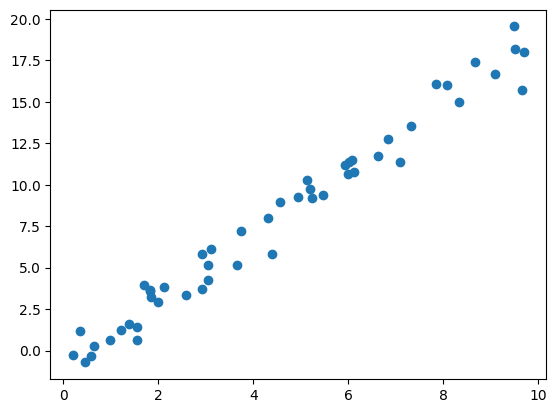

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)
print("x:",x)
print("y:", y)

Let's now walk through the process of building a linear regression model (the process is the same for all ML models).

1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [6]:
from sklearn.linear_model import LinearRegression

2. Choose model hyperparameters

An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

Would we like to fit for the offset (i.e., y-intercept)?
Would we like the model to be normalized?
Would we like to preprocess our features to add model flexibility?
What degree of regularization would we like to use in our model?
How many model components would we like to use?
These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation. We will explore how you can quantitatively motivate the choice of hyperparameters later.

For our linear regression example, we can instantiate the LinearRegression class and specify that we would like to fit the intercept using the fit_intercept hyperparameter:

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

$\rightarrow$ Explain the fit_intercept hyperparameter.

$\hookrightarrow$ This parameter indicates whether the intercept should be computed (True) or not (False).

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between choice of model and application of model to data

3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. Here our target variable y is already in the correct form (a length-n_samples array), but we need to massage the data x to make it a matrix of size [n_samples, n_features]. In this case, this amounts to a simple reshaping of the one-dimensional array:

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

4. Fit the model to your data

Now it is time to apply our model to data. This can be done with the fit() method of the model:

In [9]:
model.fit(X, y)

LinearRegression()

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example in this linear model, we have the following:

In [10]:
model.coef_
model.intercept_

-0.9033107255311146

These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [ ]:
xfit = np.linspace(-1, 11)
print("xfit: ",xfit)

$\rightarrow$ What's the effect of linspace?

$\hookrightarrow$ linspace creates an array with 50 (default value) elements the values of which range in between -1 and 11.

As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [11]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
print("Xfit: ",Xfit)
print("yfit: ",yfit)

NameError: name 'xfit' is not defined

$\rightarrow$ What's the effect of xfit[:, np.newaxis]? Of model.predict(Xfit)? What's the ype of Xfit ? Of yfit ?

$\hookrightarrow$ xfit[:, np.newaxis] creates a matrix (two-dimensional array) from the one-dimensional array xfit. model.predict(Xfit) provides the values predicted by the model learned on the data contained in Xfit, which is a two-dimensional array. The predicted values are stored in yfit, which is a one-dimensional array.

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### k-Nearest Neighbours on Iris dataset

Let's take a look at another example of this process, using the Iris dataset. Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple algorithm known as the $k$-NN algorithm (see above). We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:

In [12]:
from sklearn.datasets import load_iris
dataset = load_iris()
X_iris = dataset.data
y_iris = dataset.target

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

$\rightarrow$ What's the use of random_state?

$\hookrightarrow$ random_state is the seed used by the random number generator.

$\rightarrow$ With the data arranged, we can follow the above recipe to predict the labels using the k-NN algorithm. Write the corresponding code:

<span style="color:green">from sklearn.??? import ??? # 1. choose model class</span>

<span style="color:green">model = ???                      # 2. instantiate model</span>

<span style="color:green">model.fit(Xtrain, ytrain)                  # 3. fit model to data</span>

<span style="color:green">??? = model.predict(Xtest)             # 4. predict on new data</span>

$\hookrightarrow$ See below.

In [14]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#load data
dataset = load_iris()
X_iris = dataset.data
y_iris = dataset.target

#create train-test datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=10)
#learn model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain, ytrain)

#compute the values predicted by the learnt model on Xtest
y_model = model.predict(Xtest)

#simple print to compare the results (predicted in y_model, and true in ytest)
print("y_model:",y_model)
print("ytest:  ",ytest)

y_model: [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
ytest:   [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]


Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true value:

In [15]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, y_model)
print("Accuracy: ", acc)

#compute the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_model)

Accuracy:  0.9736842105263158


array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 12]])

$\rightarrow$ What is accuracy? Give its formula and explain it.

$\hookrightarrow$ Accuracy measures the proportion of instances taht are well classified by the learned classifier. It is defined as the ratio of correctly classified instances (#CCI) among the all instances (#I): $Accuracy = \frac{#CCI}{#I}$.

$\rightarrow$ What's the confusion matrix of the $k$-NN algorithm on the Iris dataset? Write a code to compute and visualize this matrix.

$\hookrightarrow$ The confusion matrix $C$ is $KxK$ matrix (where $K$ is the number of classes) in which rows correspond to the predicted classes and the columns to the actual classes. $C_{ij}$ indicates the number of instances that have been predicted in class $i$ but actually belong to class $j$.

## Testing and selecting models

We have seen during the last course the importance of using a holdout set, called test set, in order to estimate the performance of the model learned (a test set is a set of examples neither used for training nor validating the model).

To illustrate emprically the importance of the test set, let's implement the following steps:

1. $\rightarrow$ Load the Iris dataset storing the features in an array X and the targets in a vector y;
2. Choose as model a $k$-nearest neighbors classifier setting its hyperparameter $k$ to 1 (this is a very simple and intuitive model that says "the label of an unknown point is the same as the label of its closest training point");
3. $\rightarrow$ Train the model, and use it to predict labels for data in y;
4. $\rightarrow$ Compute the accuracy of your predictions. What do you observe? Why? (compare the results with the ones obtained in the previous section with $k=1$)

$\hookrightarrow$ See below for the code. We are using 1-NN on the training data here, so that the accuracy equals $1$ (unless there are identical examples in the training set with different classes, which can happen!). This illustrates the fact that one should not used the training data to assess the performance of a classifier (or a regressor).


In [16]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#load data
dataset = load_iris()
X = dataset.data
y = dataset.target

#learn model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

#compute the values predicted by the learnt model on Xtest
y_model = model.predict(X)

#simple print to compare the results (predicted in y_model, and true in ytest)
print("y_model:",y_model)
print("ytest:  ",y)

#compute and print accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, y_model)
print("Accuracy: ", acc)

y_model: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
ytest:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy:  1.0


As we saw in the last course, it is important to split the data into train, validation and test sets in order to be able to select the hyperparameters of the model and test its performance in an adequate manner.

$\rightarrow$ Implement the process seen in the course to select and train a $k$-nearest neighbors classifier, with $k$ being either 1, 3, 5 or 7. What's the accuracy of the selected classifier on the test set? What's the value of $k$ selected?

$\rightarrow$ Repeat the above process with different (train, validation, test) splits. What do you observe?

$\hookrightarrow$ See below fopr the code. One can observe that the results vary from on split to the other.

In [17]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#load data
dataset = load_iris()
X = dataset.data
y = dataset.target

# Loop over different (train, validation, test) splits
for loop in range(1,10):
    print("Split: ",loop)
    # Create train-val-test split
    Xtrainval, Xtest, ytrainval, ytest = train_test_split(X, y)
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrainval, ytrainval)
    # Compute accuracies on val set for different values of k
    KLIST=(1,3,5,7)
    Arr_acc = [0] * len(KLIST)
    Arr_ind = [0] * len(KLIST)
    i = 0
    for k in KLIST:
        # Learn model
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Xtrain, ytrain)
        # Compute the values predicted by the learnt model on Xtest
        y_model = model.predict(Xval)
        # Compute accuracy
        Arr_acc[i] = accuracy_score(yval, y_model)
        Arr_ind[i] = k
        i += 1
    # Select best k value
    max_value = max(Arr_acc)
    ind_best = Arr_acc.index(max_value)
    k_best = Arr_ind[ind_best]
    # Compute accuracy on test set with best value - the model is 'retrained' on tran+val
    model.fit(Xtrainval, ytrainval)
    y_pred = model.predict(Xtest)
    acc_test = accuracy_score(ytest, y_pred)
    # Print results
    print(" Best k:",k_best,"- Acc. on val.:",max_value,"- Acc. on test:",acc_test)

Split:  1
 Best k: 1 - Acc. on val.: 1.0 - Acc. on test: 0.9473684210526315
Split:  2
 Best k: 3 - Acc. on val.: 0.9642857142857143 - Acc. on test: 0.9736842105263158
Split:  3
 Best k: 3 - Acc. on val.: 0.9285714285714286 - Acc. on test: 1.0
Split:  4
 Best k: 5 - Acc. on val.: 0.9642857142857143 - Acc. on test: 0.9736842105263158
Split:  5
 Best k: 7 - Acc. on val.: 0.9642857142857143 - Acc. on test: 0.9736842105263158
Split:  6
 Best k: 1 - Acc. on val.: 1.0 - Acc. on test: 0.9473684210526315
Split:  7
 Best k: 1 - Acc. on val.: 0.9642857142857143 - Acc. on test: 0.9736842105263158
Split:  8
 Best k: 1 - Acc. on val.: 1.0 - Acc. on test: 0.9210526315789473
Split:  9
 Best k: 7 - Acc. on val.: 1.0 - Acc. on test: 0.9473684210526315


### Cross-validation

The problem with the above process is that the accuracy of the learned classifier depends on the test set selected. We have in fact no clue on whether the accuracy of our classifier greatly varies from one dataset to the other.

#### Cross-validating metrics

To better evaluate the performance of a model, we resort to cross-validation, which consists in repeating (train,test) splits of the data so taht each data point is used for both training and testing the model. For example, we can split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data (this is called $K$-flod cross-vlidation):

In [49]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
y = dataset.target
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

One can then compute the mean and variance of the obtained accuracies in order to get a better idea of how our classifier will perform on unseen data.

$\rightarrow$ Compute the mean and variance of the accuracy of your model using 10-fold cross-validation.

$\hookrightarrow$ See below.

In [50]:
res_val = cross_val_score(model, X, y, cv=10)
mean = sum(res_val) / len(res_val)
vari = sum((i - mean) ** 2 for i in res_val) / len(res_val)

print("Mean: ",mean," Variance: ",vari)

Mean:  0.9600000000000002  Variance:  0.0028444444444444424


#### Cross-validating metrics and selecting hyperparameters

It is of course possible to combine the selection of hyperparameters and the cross-validation process above. Note that in that case however different models may be selected and evaluated on each fold.

### Illustration of the bias-variance tradeoff

Let's finally look at an example illustrating the bias-variance tradeoff. Here we will use a polynomial regression model: this is a generalized linear model in which the degree of the polynomial is a tunable parameter. For example, a degree-1 polynomial fits a straight line to the data; for model parameters $a$ and $b$:

\begin{equation*}
y = ax +b.
\end{equation*}
 
A degree-3 polynomial fits a cubic curve to the data; for model parameters $a$, $b$, $c$and $d$:

\begin{equation*}
y = a x^3 + b x^2 + cx +d.
\end{equation*}
 
We can generalize this to any number of polynomial features. In Scikit-Learn, we can implement this with a simple linear regression combined with the polynomial preprocessor. We will use a pipeline to string these operations together:

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Now let's create some data to which we will fit our model:

In [52]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

We can now visualize our data, along with polynomial fits of several degrees:

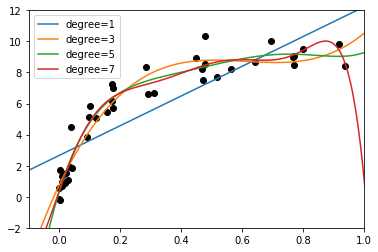

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

# plotting polynomials with increasing degrees
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5, 7]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

$\rightarrow$ What do you observe?

$\hookrightarrow$ The fit to the data seems to increase with the degree of the polynomial. For the polynomial of degree 7, however, the sharp decrease towards x=1 may not be relevant. Indeed, if the model perfectly fits the training data, its ability to generalize to unseen data may be limited.
The knob controlling model complexity in this case is the degree of the polynomial, which can be any non-negative integer. A useful question to answer is this: what is a good degree of polynomial?

We can make progress in this by visualizing the validation curve for this particular data and model; this can be done straightforwardly using the validation_curve convenience routine provided by Scikit-Learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range:

Text(0, 0.5, 'score')

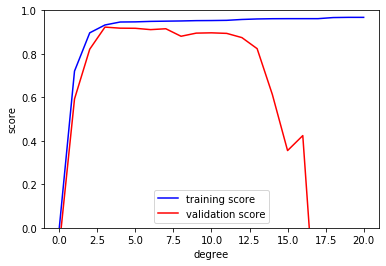

In [54]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

$\rightarrow$ Does this correspond to the expected result?

$\hookrightarrow$ Yes; it's a direct illustration of the bias-variance tradeoff in which the training error, but not the test error, diminishes with the complexity of the model.

$\rightarrow$ What's the best polynomial to use? Plot the dataset with this polynomial.

$\hookrightarrow$ The best polynomial is a third-order polynomial. Its plot is given below.

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

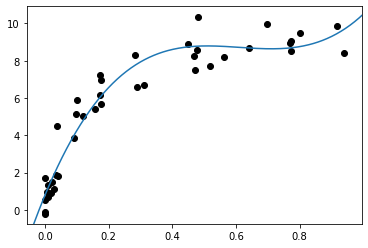

In [55]:
plt.scatter(X.ravel(), y, color='black')
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)